The game plan for this problem is to take a forrier transformation of the radial velocity to find the periods of the orbitting exoplanets. This should also have the added benift of telling us how many planets are orbitting the sun. Then we are going to find the velocity of the sun, which we can then use in the formula 
M2=(((total mass)^2/Gravity)((Velocity1^3*period)/2pi))^1/3
to find the mass of the orbiting exoplanet the mass of the orbitting exoplanets

Also because we know the period of the planets we can 'fold' the data by the period this allows us to find the phase of their orbits and also get a rough estimation of how much each planet dims the brightness of the sun. Now using the formula %of light lost=(planet_radius^2/sun_radius^2) we can find the radius of each planet. 

Imports the useful packages

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Imports the data we are using. Transit data is the normalized brightness of the star with irregularly observations. Doppler data is the normalized radial velocity of the star taken every 25k seconds

In [10]:
doppler = pd.read_csv('Prob3_Doppler.csv')
transit = pd.read_csv('Prob3_Transit.csv')
doppler.head()

transit.head()

,time_sec,norm_bright
0,40000,1.000156
1,59500,1.000071
2,63500,1.000598
3,80500,1.000075
4,92500,1.000400


In this code chunk we use a forrier transformation on the doppler data to find the period the exoplanets orbits. Even though we are only looking at the stars period, the period of the star and the exoplanets will be the same. We can see that there are two 'wobbles' in the sun meaning that the star has two exoplanets

Text(0, 0.5, 'strength of signal')

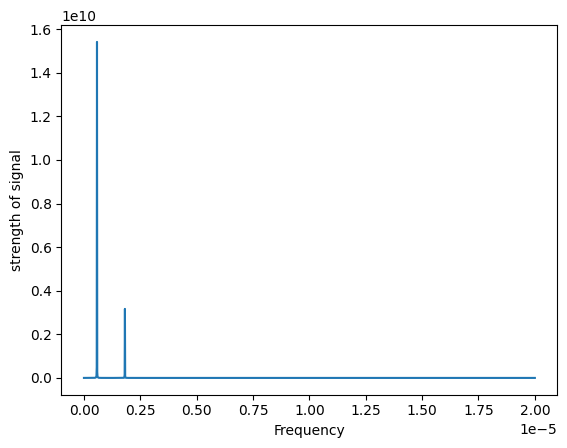

In [18]:
y=abs(np.fft.rfft(doppler['rad_vel']))**2
x=np.fft.rfftfreq(len(doppler['time_sec']),25000)
plt.plot(x,y)
plt.xlabel('Frequency')
plt.ylabel('strength of signal')

Now we convert the data from the forrier transformation into more useable data. We do this by find the location of the two peaks and converting the frequecy into a period. We find the the period of the exoplanets are 1728000 seconds(20 days) and 550318.4 seconds(6.36 days). We are storing the period in seconds for conveinence 

In [12]:
max_power_idx = np.argmax(y)
dominant_frequency=x[max_power_idx]
period1=1/dominant_frequency
y[max_power_idx]=0

max_power_idx2 = np.argmax(y)
dominant_frequency=x[max_power_idx2]
period2=1/dominant_frequency
print(period1)
print(period2)
print(period1/86400)
print(period2/86400)

1728000.0
550318.4713375797
20.0
6.369426751592357


Using the forrier transformation again we find the 'amplitude' of the stars orbits. In this case it represents the maximum individual contribution to radial velocity of the star. Because of how orbits work though this is the velocity that the star its always orbitting at, just at certian times its coming strait at us or strait away from us. Now that we know this radial velocity we can use these as velocities in a future equation to calculate mass of the planets. 

In [13]:
temp_fft=abs(np.fft.rfft(doppler['rad_vel']))
velocity1=(1/len(doppler['rad_vel'])*2*temp_fft[max_power_idx])
velocity2=(1/len(doppler['rad_vel'])*2*temp_fft[max_power_idx2])
print(velocity1)
print(velocity2)


71.84789293681331
32.56346790412283


We now use the equation M2=(((total mass)^2/Gravity)((Velocity1^3*period)/2pi))^1/3 to calculate the mass of the exoplanets which tells us that one planet has the mass of 3.907105774906571e+27 kilograms and another planet has the mass of 1.2092847223368153e+27 kilograms

In [14]:
Gravity_constant=6.67408e-11
sun_mass=1.9885e30
mass1=(((sun_mass**2/Gravity_constant)*(((velocity1**3)*period1)/2*np.pi))**(1/3))*1000
print(mass1)
mass2=(((sun_mass**2/Gravity_constant)*(((velocity2**3)*period2)/2*np.pi))**(1/3))*1000
print(mass2)

3.907105774906571e+30
1.2092847223368152e+30


Because we know the period of the planets, we can 'fold' the data within the transit dataset by the period. This allows us to better see the dip in brightness caused by the planet passing in front of the star. We then isolate the datapoints that have a lower brightness because of the planet and take the average brightness of them. This tells us on average how much the planet passing in front of the star lowers the brightness. We can now use the equation $\text{\% of light lost}=\frac{R_{planet}^2}{R_{star}^2}$ to calculate the radius of the planets. We find that the planets have a radius of 51056.5 kilometers and 40192.1 kilometers. 

5105652409.363321
4019213515.6706905


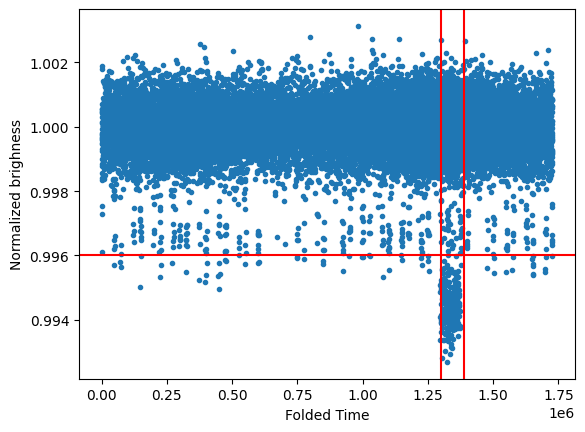

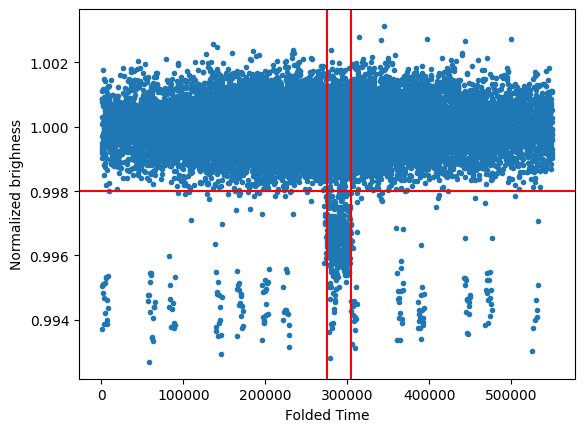

In [20]:
plt.plot(transit['time_sec']%period1,transit['norm_bright'],'.')
plt.axvline(1.3e6,color='r')
plt.axvline(1.39e6,color='r')
plt.axhline(0.996,color='r')
plt.xlabel('Folded Time')
plt.ylabel('Normalized brighness')
plt.figure()
plt.plot(transit['time_sec']%period2,transit['norm_bright'],'.')
plt.xlabel('Folded Time')
plt.ylabel('Normalized brighness')
plt.axvline(2.75e5,color='r')
plt.axvline(3.05e5,color='r')
plt.axhline(0.998,color='r')
transit['folded_time1']=transit['time_sec']%1728000
amount_dimmed1=1-(transit['norm_bright'].loc[(transit['folded_time1']<1.39e6) & (transit['folded_time1']>1.35e6) & (transit['norm_bright']<0.996)].mean())
amount_dimmed2=1-(transit['norm_bright'].loc[(transit['folded_time1']<3.05e5) & (transit['folded_time1']>2.75e5) & (transit['norm_bright']<0.998) ].mean())
planet1size=((amount_dimmed1*(695700**2))**.5)*100000
planet2size=((amount_dimmed2*(695700**2))**.5)*100000
print(planet1size)
print(planet2size)

Now that we have the mass of the planets and the radius of the planets we can use the equation $\frac{{4}}{{3}} \pi r^3$ to find the volume of the planet. Now that we know the mass and volumes of the planets we can use the equation $\text{Density}=\frac{M}{V}$. This tells the density of the planets are 7008302270255.5 kilograms per cubic kilometer and 4446483882396 kilograms per cubic kilometer.

In [16]:
print(mass1/(4/3*np.pi*((planet1size**3))))
print(mass2/(4/3*np.pi*((planet2size**3))))

7.008302270255558
4.446483882396049


To conclude we know 
-There are two planets orbitting this star
-The planets periods are 20 days and 6.3 days
-The planets masses are 3.9e30 and 1.2e30 grams
-The planets radius is 5105652409 and 4019213515 cm
-The planets densities are 7.008 and 4.446 gram per $\text{cm}^3$
- The planets orbits are significantly faster than earth, they weigh around 1000x more than earth and one is more dense and the other is less dense